You work for Spark Funds, an asset management company. Spark Funds wants to make 
investments in a few companies. The CEO of Spark Funds wants to understand the global trends 
in investments so that she can take the investment decisions effectively.

Spark Funds has two minor constraints for investments: 
1. It wants to invest between 5 to 15 million USD per round of investment 
2. It wants to invest only in English-speaking countries because of the ease of 
communication with the companies it would invest in.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
#LOADING FILES AND CREATING DATAFRAMES
companies=pd.read_csv(r"F:\Data Analytics\Industrial-Assignment\Industrial-Assignment\companies.txt",encoding = "ISO-8859-1",sep="\t")
rounds2=pd.read_csv(r"F:\Data Analytics\Industrial-Assignment\Industrial-Assignment\rounds2.csv",encoding = "ISO-8859-1")

In [3]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


#   Data Understanding And Prepration

In [7]:
#Converting the upper cases to lower cases in company_permalink and permalink column of rounds2 and companies dataframe repectively
rounds2["company_permalink"]=rounds2["company_permalink"].str.lower()
companies["permalink"]=companies["permalink"].str.lower()

In [8]:
# Unique Companies in round2
print(rounds2["company_permalink"].unique())
print(rounds2["company_permalink"].nunique())

['/organization/-fame' '/organization/-qounter'
 '/organization/-the-one-of-them-inc-' ... '/organization/ã\x81eron'
 '/organization/ã\x94asys-2'
 '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic']
66370


In [9]:
# Unique Companies in companies 
print(companies.permalink.unique())
print(companies.permalink.nunique())

['/organization/-fame' '/organization/-qounter'
 '/organization/-the-one-of-them-inc-' ... '/organization/ã\x81eron'
 '/organization/ã\x94asys-2'
 '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic']
66368


### We have seen that there are ``` junk``` characters in the company and rounds2 dataset therefore removing the junk characters 

In [10]:
##REMOVING JUNK
rounds2['company_permalink']=rounds2['company_permalink'].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))
companies["permalink"]=companies["permalink"].apply(lambda x:x.encode('utf-8').decode('ascii','ignore'))

### Now working on the datasets

In [11]:
# Unique Companies in round2
rounds_unique=rounds2["company_permalink"].unique()
print(rounds2["company_permalink"].nunique())


# Unique Companies in companies 
company_unique=companies.permalink.unique()
print(companies.permalink.nunique())

66368
66368


In [12]:
companies.nunique()
#WE CAN USE permalink columns as a key for each comapny

permalink        66368
name             66102
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [13]:
## Checking  that rounds2 company permalink are same as comapnies permalinks
print((rounds_unique==company_unique).all())

True


In [14]:
## MERGING THE TWO DATA FRAMES
master_frame=pd.merge(rounds2,companies,left_on="company_permalink",right_on="permalink",how="inner")

In [15]:
master_frame.shape

(114949, 16)

In [16]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


# Cleaning the dataset


In [17]:
#Checking the percentage of null data
100*(master_frame.isnull().sum()/len(master_frame))

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [18]:
# Removing the columns "funding_round_code","founded_at","permalink"
master_frame=master_frame.drop(labels=["funding_round_code","founded_at","permalink"],axis=1)

In [19]:
100*(master_frame.isnull().sum()/len(master_frame))

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
dtype: float64

In [20]:
# Now we would remove the rows for which we have nan values for the ```raised_amount_usd```
master_frame=master_frame[~np.isnan(master_frame["raised_amount_usd"])]

In [21]:
100*(master_frame.isnull().sum()/len(master_frame))

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
homepage_url              4.56
category_list             1.10
status                    0.00
country_code              6.16
state_code                8.01
region                    7.42
city                      7.42
dtype: float64

In [22]:
# Further dropping the columns that are of no usage for our analysis
master_frame=master_frame.drop(labels=["homepage_url","state_code","region","city"],axis=1)

In [23]:
100*(master_frame.isnull().sum()/len(master_frame))

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
dtype: float64

In [24]:
# removing the rows where category list is null
master_frame=master_frame[~pd.isnull(master_frame["category_list"])]

In [25]:
#removing the rows where name is null
master_frame=master_frame[~pd.isnull(master_frame["name"])]

In [26]:
100*(master_frame.isnull().sum()/len(master_frame))

company_permalink         0.00
funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              5.74
dtype: float64

In [27]:
master_frame=master_frame[~pd.isnull(master_frame["country_code"])]

In [28]:
## Now remove further columns which are of less importance to us
master_frame=master_frame.drop(labels=["funding_round_permalink","funded_at","name"],axis=1)

In [29]:
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code
0,/organization/-fame,venture,"10,000,000.00",Media,operating,IND
2,/organization/-qounter,seed,"700,000.00",Application Platforms|Real Time|Social Network...,operating,USA
4,/organization/0-6-com,venture,"2,000,000.00",Curated Web,operating,CHN
6,/organization/01games-technology,undisclosed,"41,250.00",Games,operating,HKG
7,/organization/0ndine-biomedical-inc,seed,"43,360.00",Biotechnology,operating,CAN


In [30]:
master_frame.shape

(88528, 6)

#  Funding Type Analysis 

## Investment type analysis

Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make.

Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)
As mentioned above we have to extract data where funding_round_type is venture, angel, seed, and private equity

In [31]:
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [32]:
fund_master_frame=master_frame[(master_frame.raised_amount_usd>=5000000)&(master_frame.raised_amount_usd<=15000000)]

In [33]:
fund_master_frame.shape

(17887, 6)

In [34]:
#Taking the funding round type as on of the four types
lst=['venture', 'angel', 'seed','private_equity']
fund_master_frame=master_frame[master_frame.funding_round_type.isin(lst)]

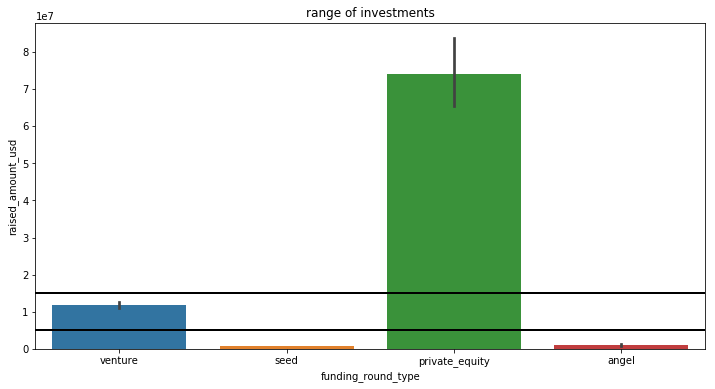

In [35]:
# Graph to see which funding type investmenst are under our constraints
plt.figure(figsize=(12,6))
plt.title("range of investments")
sb.barplot(x="funding_round_type",y="raised_amount_usd",data=fund_master_frame)
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')

### From the above graph we have seen that ```venture``` and  ```private_equity``` lies between the criteria of investment b/w 5 million to 15 million

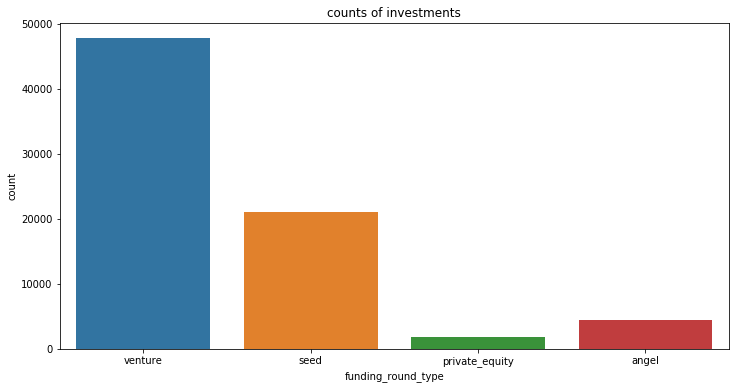

In [36]:
# Now checking for which funding round type would be taken ...
plt.figure(figsize=(12,6))
#Count plot to see which fund round type is the most where investments are done
plt.title("counts of investments")
sb.countplot(x="funding_round_type",data=fund_master_frame)

### It is clear from the above graph that  ```venture```  is having more number of investments than the ```private_equity``` therefor taking the  ```venture```  as  the most suitable for Spark Funds

In [37]:
fund_master_frame.groupby(by="funding_round_type")["raised_amount_usd"].mean().sort_values(ascending=False)

funding_round_type
private_equity   73,938,486.28
venture          11,724,222.69
angel               971,573.89
seed                747,827.95
Name: raised_amount_usd, dtype: float64

In [38]:
# Filtering master_frame according so that it may contain only the desired information
venture_master_frame=fund_master_frame[fund_master_frame["funding_round_type"]=="venture"]

In [39]:
venture_master_frame.shape

(47809, 6)

#  Country Analysis 

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type
It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.
Consider a country to be English speaking only if English is one of the official languages in that country
So First i am going to extract only those countries where official languages is english

fetch the list of english- speaking countries from the given link i.e. https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

## Taking only  countries where english is an official language

In [40]:
# Reading the table from the given URL
tables=pd.read_html("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language")

In [41]:
type(tables)

list

In [42]:
# Taking the 2 column(2-alpha counry code) of the first table in the tale list
countries=tables[1][2].apply(lambda x:x.split("[")[0])

In [43]:
# Taking the 2 column(2-alpha counry code) of the second table in the tale list
countries2=tables[0][2].apply(lambda x:x.split("[")[0])

In [44]:
# Removing the first row (as it containg only the country header)
countries.drop(labels=0,axis=0,inplace=True)
countries2.drop(labels=0,axis=0,inplace=True)

In [45]:
# Merging the two series to get one single english official language country series
country_code=pd.concat([countries,countries2],ignore_index=True)

In [46]:
# converting the series into county_code dataframe
country_df=pd.DataFrame(data=country_code)

In [47]:
# rename the dataframe column to country_code which is same as the country_code in master_frame
country_df.rename(columns={2:"country_code"},inplace=True)

In [48]:
# Merging the dataframe to get only those companies where english is the official language
venture_master_frame=venture_master_frame.merge(country_df,on="country_code",how="inner")

In [49]:
venture_master_frame.describe()

,raised_amount_usd
count,"40,824.00"
mean,"11,533,972.00"
std,"94,200,053.92"
min,0.00
25%,"1,600,000.00"
50%,"5,000,000.00"
75%,"12,000,000.00"
max,"17,600,000,000.00"


In [50]:
# grouping the investment data according to the country code
top9=venture_master_frame.groupby(by="country_code")["raised_amount_usd"].sum().sort_values(ascending=False).to_frame()

In [51]:
top9.reset_index(inplace=True)
top9

,country_code,raised_amount_usd
0,USA,"420,068,029,342.00"
1,GBR,"20,072,813,004.00"
2,IND,"14,261,508,718.00"
3,CAN,"9,482,217,668.00"
4,SGP,"2,793,917,856.00"
5,IRL,"1,669,285,543.00"
6,AUS,"1,319,028,698.00"
7,NZL,"448,316,383.00"
8,ZAF,"233,713,106.00"
9,NGA,"183,440,000.00"


In [52]:
#Slciing the dataframe top9 to get the top-9  countries which have received the highest total funding
top9=top9.loc[:8,:]

In [53]:
top9

,country_code,raised_amount_usd
0,USA,"420,068,029,342.00"
1,GBR,"20,072,813,004.00"
2,IND,"14,261,508,718.00"
3,CAN,"9,482,217,668.00"
4,SGP,"2,793,917,856.00"
5,IRL,"1,669,285,543.00"
6,AUS,"1,319,028,698.00"
7,NZL,"448,316,383.00"
8,ZAF,"233,713,106.00"


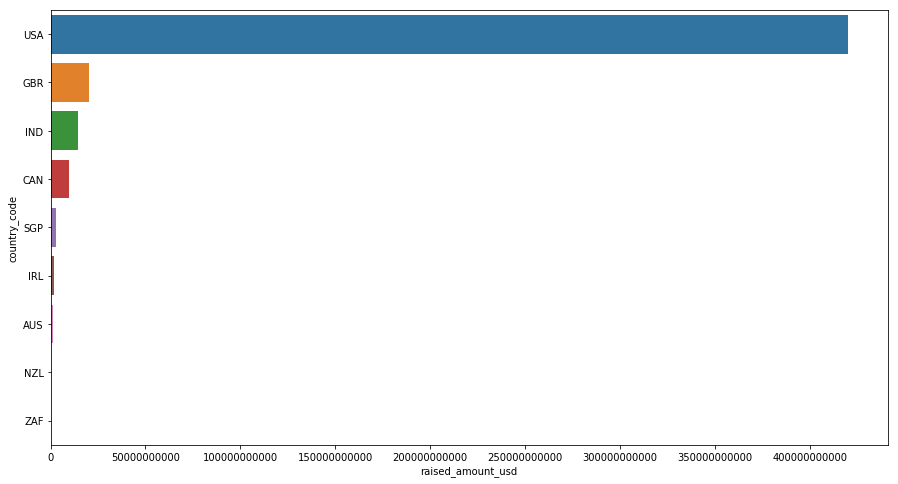

In [54]:
plt.figure(figsize=(15,8))
sb.barplot(y=top9.country_code,x=top9.raised_amount_usd,estimator=np.sum)
plt.ticklabel_format(style='plain', axis='x')

## The three English-speaking countries in the data frame top9 are
## ```USA``` ,
## ```GBR``` and
## ```IND```

In [55]:
country=list(top9.country_code)
venture_master_frame=venture_master_frame[venture_master_frame.country_code.isin(country)]

In [56]:
venture_master_frame.shape

(40766, 6)

#  Sector Analysis 1 

This is the third goal of analysis — sector analysis. 
  
When we say sector analysis, we refer to one of the eight main 
sectors (named main_sector) listed in the mapping file (note that ‘Other’ is one of the eight 
main sectors). This is to simplify the analysis by grouping the numerous category lists (named 
‘category_list’) in the mapping file. For example, in the mapping file, category_lists such as 
‘3D’, ‘3D Printing’, ‘3D Technology’, etc. are mapped to the main sector ‘Manufacturing’

In [57]:
mapping=pd.read_csv(r"F:\Data Analytics\Industrial-Assignment\Industrial-Assignment\mapping.csv")

In [58]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [59]:
mapping=pd.melt(mapping,id_vars="category_list")


In [60]:
mapping=mapping[mapping.value==1]

In [61]:
mapping.drop(labels="value",axis=1,inplace=True)

In [62]:
## Extract the primary sector of each category list from the category_list column 
venture_master_frame["primary_sector"]=venture_master_frame.category_list.apply(lambda x:x.split("|")[0]).str.lower()

In [63]:
mapping.head()

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [64]:
mapping.category_list=mapping.category_list.str.lower()
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)

In [65]:
venture_master_frame=pd.merge(venture_master_frame,mapping,on="primary_sector")

In [66]:
venture_master_frame

,company_permalink,funding_round_type,raised_amount_usd,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,"10,000,000.00",Media,operating,IND,media,Entertainment
1,/organization/manas-informatics,venture,"160,000.00",Media|News,operating,IND,media,Entertainment
2,/organization/all-def-digital,venture,"5,000,000.00",Media,operating,USA,media,Entertainment
3,/organization/audiosocket,venture,"650,000.00",Media|Music|Technology,operating,USA,media,Entertainment
4,/organization/audiosocket,venture,"750,000.00",Media|Music|Technology,operating,USA,media,Entertainment
5,/organization/audiosocket,venture,"1,582,300.00",Media|Music|Technology,operating,USA,media,Entertainment
6,/organization/babble,venture,"2,000,000.00",Media|News|Parenting,acquired,USA,media,Entertainment
7,/organization/babble,venture,"1,250,000.00",Media|News|Parenting,acquired,USA,media,Entertainment
8,/organization/babble,venture,"3,000,000.00",Media|News|Parenting,acquired,USA,media,Entertainment
9,/organization/bedloo,venture,"657,589.00",Media|News|Software,operating,USA,media,Entertainment


#  Sector Analysis 2

Now you have a data frame with each company’s main sector (main_sector) mapped to it. When 
we say sector analysis, we refer to one of the eight main sectors. 
  
Also, you know the top three English speaking countries and the most suitable funding type for 
Spark Funds. Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the 
funding type 'FT'. 
Also, the range of funding preferred by Spark Funds is 5 to 15 million USD. 
  
Now, the aim is to find out the most heavily invested main sectors in each of the three countries 
(for funding type FT and investments range of 5-15 M USD

In [67]:
venture_master_frame.main_sector.unique()

array(['Entertainment', 'Others', 'Manufacturing',
       'Cleantech / Semiconductors',
       'Social, Finance, Analytics, Advertising', 'Automotive & Sports',
       'News, Search and Messaging', 'Health'], dtype=object)

In [68]:
D1=venture_master_frame[(venture_master_frame.country_code=="USA")&(venture_master_frame.raised_amount_usd>=5000000)&(venture_master_frame.raised_amount_usd<=15000000)]
D2=venture_master_frame[(venture_master_frame.country_code=="GBR")&(venture_master_frame.raised_amount_usd>=5000000)&(venture_master_frame.raised_amount_usd<=15000000)]
D3=venture_master_frame[(venture_master_frame.country_code=="IND")&(venture_master_frame.raised_amount_usd>=5000000)&(venture_master_frame.raised_amount_usd<=15000000)]

## Creating three separate data frames D1, D2 and D3 for each of the three countries USA , GBR ,IND

In [69]:
# For USA
usa=D1.pivot_table(values="raised_amount_usd",index="main_sector",aggfunc=("sum","count")).reset_index()
D1=D1.merge(usa,on="main_sector")

In [70]:
# for GBR
gbr=D2.pivot_table(values="raised_amount_usd",index="main_sector",aggfunc=("sum","count")).reset_index()
D2=D2.merge(usa,on="main_sector")

In [71]:
# for IND
ind=D1.pivot_table(values="raised_amount_usd",index="main_sector",aggfunc=("sum","count")).reset_index()
D3=D3.merge(usa,on="main_sector")

### Getting the count , sum of investments and the  in the three countries

### USA

In [72]:
## FOR USA
print("Count of investments for USA =",D1.raised_amount_usd.count())
print("sum of investments for USA=",D1.raised_amount_usd.sum(),'\n')
print(D1.groupby(by="main_sector")["raised_amount_usd"].count().sort_values(ascending=False))


Count of investments for USA = 11149
sum of investments for USA= 99661524549.0 

main_sector
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
News, Search and Messaging                 1563
Health                                      908
Manufacturing                               799
Entertainment                               580
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64


In [73]:
print("the company recieved the highest investment in  Top Sector i.e. Others Sector")
print(D1[D1.main_sector=="Others"].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5))

print("\nThe company recieved the highest investment in  Second best Sector i.e. Cleantech / Semiconductors Sector")
print(D1[D1.main_sector=="Cleantech / Semiconductors"].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5))


the company recieved the highest investment in  Top Sector i.e. Others Sector
company_permalink
/organization/virtustream           64,300,000.00
/organization/capella               54,968,051.00
/organization/airtight-networks     54,201,907.00
/organization/decarta               52,100,000.00
/organization/black-duck-software   51,000,000.00
Name: raised_amount_usd, dtype: float64

The company recieved the highest investment in  Second best Sector i.e. Cleantech / Semiconductors Sector
company_permalink
/organization/biodesix        75,300,000.00
/organization/tigo-energy     68,739,496.00
/organization/forsight-labs   61,300,001.00
/organization/rheonix         56,124,758.00
/organization/scienergy       55,375,423.00
Name: raised_amount_usd, dtype: float64


### GBR-

In [74]:
## FOR GBR
print("Count of investments for GBR =",D2.raised_amount_usd.count())
print("sum of investments for GBR=",D2.raised_amount_usd.sum(),'\n')
print(D2.groupby(by="main_sector")["raised_amount_usd"].count().sort_values(ascending=False))


Count of investments for GBR = 577
sum of investments for GBR= 5028704358.0 

main_sector
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
News, Search and Messaging                  73
Entertainment                               54
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64


In [75]:
print("the company recieved the highest investment in  Top Sector i.e. Others Sector")
print(D2[D2.main_sector=="Others"].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5))

print("\nThe company recieved the highest investment in  Second best Sector i.e. Cleantech / Semiconductors Sector")
print(D2[D2.main_sector=="Cleantech / Semiconductors"].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5))


the company recieved the highest investment in  Top Sector i.e. Others Sector
company_permalink
/organization/electric-cloud            37,000,000.00
/organization/sensage                   36,250,000.00
/organization/enigmatic                 32,500,000.00
/organization/silverrail-technologies   29,000,000.00
/organization/opencloud                 27,972,766.00
Name: raised_amount_usd, dtype: float64

The company recieved the highest investment in  Second best Sector i.e. Cleantech / Semiconductors Sector
company_permalink
/organization/eusa-pharma                                                     35,600,000.00
/organization/horizon-discovery                                               31,353,719.00
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h   29,132,906.00
/organization/elixent                                                         25,000,000.00
/organization/takeda-cambridge                                                22,340,000.00
Name: rai

### IND

In [76]:
## FOR IND
print("Count of investments for IND=",D3.raised_amount_usd.count())
print("sum of investments for IND=",D3.raised_amount_usd.sum(),'\n')
print(D3.groupby(by="main_sector")["raised_amount_usd"].count().sort_values(ascending=False))


Count of investments for IND= 299
sum of investments for IND= 2683537552.0 

main_sector
Others                                     109
News, Search and Messaging                  52
Entertainment                               33
Social, Finance, Analytics, Advertising     32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64


In [77]:
print("the company recieved the highest investment in  Top Sector i.e. Others Sector")
print(D3[D3.main_sector=="Others"].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5))

print("The company recieved the highest investment in  Second best Sector i.e. News, Search and Messaging Sector")
print(D3[D3.main_sector=="News, Search and Messaging"].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5))


the company recieved the highest investment in  Top Sector i.e. Others Sector
company_permalink
/organization/firstcry-com       39,000,000.00
/organization/myntra             38,000,000.00
/organization/commonfloor        32,900,000.00
/organization/pepperfry-com      28,000,000.00
/organization/itzcash-card-ltd   25,000,000.00
Name: raised_amount_usd, dtype: float64
The company recieved the highest investment in  Second best Sector i.e. News, Search and Messaging Sector
company_permalink
/organization/gupshup-technology-india-pvt-ltd   33,000,000.00
/organization/imimobile                          23,000,000.00
/organization/sms-gupshup                        22,000,000.00
/organization/hike                               21,000,000.00
/organization/roadrunnr                          21,000,000.00
Name: raised_amount_usd, dtype: float64


# Plots

As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she 
wants to see the following plots: 
1. A plot showing the fraction of total investments (globally) in venture, seed, and private 
equity, and the average amount of investment in each funding type. This chart should 
make it clear that a certain funding type (FT) is best suited for Spark Funds. 
2. A plot showing the top 9 countries against the total amount of investments of funding 
type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) 
very clear. 
3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on 
one chart (for the chosen investment type FT).  
  
This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3. 

In [78]:
plots_df = master_frame[(master_frame['funding_round_type'].isin(["venture","seed","private_equity"])) ]

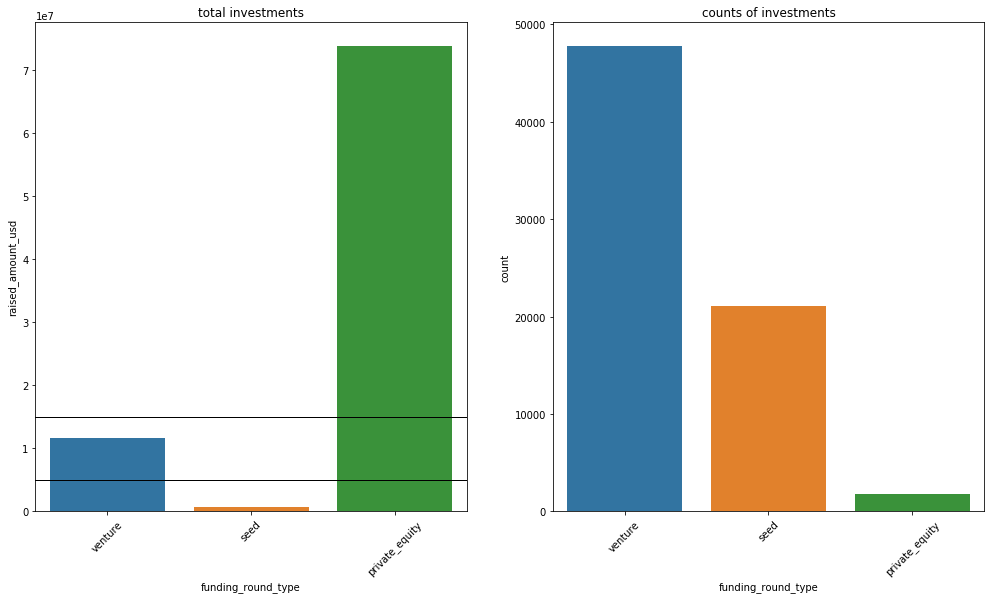

In [79]:
plt.figure(figsize=(17,9))

plt.yscale('log')
plt.subplot(1,2,1)
plt.title("total investments")

sb.barplot(x="funding_round_type",y="raised_amount_usd",data=plots_df,ci=False)
plt.axhline(y=5000000, linewidth=1, color = 'k')
plt.axhline(y=15000000, linewidth=1, color = 'k')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title("counts of investments")
sb.countplot(x="funding_round_type",data=plots_df)
plt.xticks(rotation=45)
plt.show()

C:\Users\Dhawal Agarwal\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


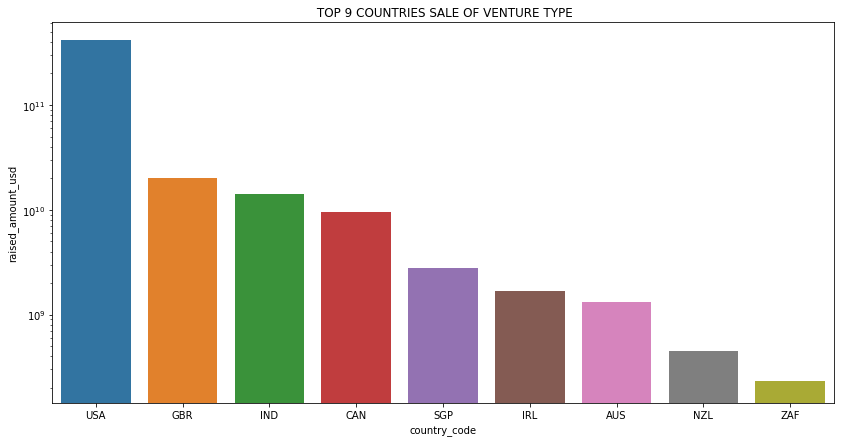

In [80]:
plt.figure(figsize = (14,7))

plt.yscale('log')
plt.title(" TOP 9 COUNTRIES SALE OF VENTURE TYPE")
sb.barplot(x = top9.country_code, y = top9.raised_amount_usd)

In [81]:
usa_top3_sector = ['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']
can_top3_sector = ['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']
ind_top3_sector = ['Others','News, Search and Messaging','Entertainment']

In [82]:
D1_ = D1[D1['main_sector'].isin(usa_top3_sector)]
D2_ = D2[D2['main_sector'].isin(can_top3_sector)]
D3_ = D3[D3['main_sector'].isin(ind_top3_sector)]

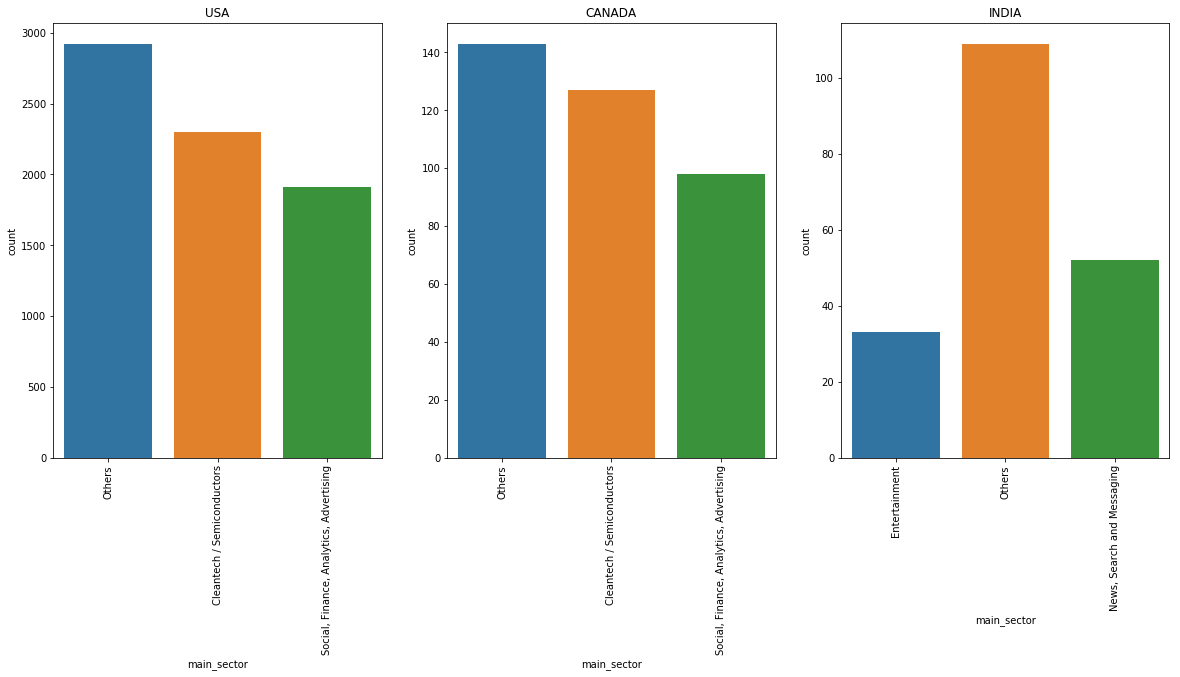

In [87]:
plt.figure(figsize = (20,8))
# FOR USA
plt.subplot(131)
plt.title('USA')
plt.xticks(rotation = 90)
sb.countplot(x='main_sector',data =D1_)

#FOR CANADA
plt.subplot(132)
plt.title('CANADA')
plt.xticks(rotation = 90)
sb.countplot(x='main_sector',data =D2_)


#FOR INDIA
plt.subplot(133)
plt.title('INDIA')
plt.xticks(rotation = 90)
sb.countplot(x='main_sector',data =D3_)

plt.show()